# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms 
### Sarafanov Michail, Big Data and Machine Learning, C4134

In [7]:
# Download all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.optimize import newton
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.optimize import differential_evolution
import numdifftools as nd

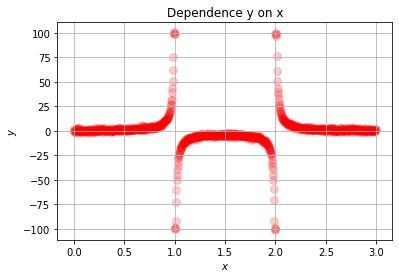

In [8]:
# Generate an array of data in accordance with the task
y_list = []
x_list = []
for k in range(0,1000):
    x = (3*k)/1000
    f_x = 1/(x**2 - 3*x + 2)
    q = random.normalvariate(0, 1)
    if f_x < -100:
        y = -100 + q
    elif f_x > 100:
        y = 100 + q
    else:
        y = f_x + q
    y_list.append(y)
    x_list.append(x)
x_list = np.array(x_list)
y_list = np.array(y_list)

# Draw a graph
plt.scatter(x_list, y_list, s = 60, color='red', alpha = 0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.grid()
plt.show()

## Nelder-Mead algorithm

Optimization terminated successfully.
         Current function value: 242946.300931
         Iterations: 286
         Function evaluations: 491
The optimal value of the coefficient a - -0.09000258287644224
The optimal value of the coefficient b - 0.175117324468825
The optimal value of the coefficient c - -3.9738183941773157
The optimal value of the coefficient d - 3.947846088004243


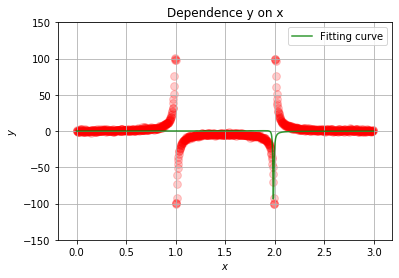

In [9]:
# Implement the function of the errors
def f_error(w):
    a = w[0]
    b = w[1]
    c = w[2]
    d = w[3]
    return(sum(((a*x_list + b)/(x_list**2 + c*x_list + d) - y_list) ** 2))

# Find the minimum for a function of two variables using the Nelder-Mead method
x0 = np.array([1, -1, -1, 1])
minimum_NM = minimize(f_error, x0, method='nelder-mead', options={'disp': True, 'fatol': 0.01})
a_opt_NM = minimum_NM.x[0]
b_opt_NM = minimum_NM.x[1]
c_opt_NM = minimum_NM.x[2]
d_opt_NM = minimum_NM.x[3]
print('The optimal value of the coefficient a -', a_opt_NM)
print('The optimal value of the coefficient b -', b_opt_NM)
print('The optimal value of the coefficient c -', c_opt_NM)
print('The optimal value of the coefficient d -', d_opt_NM)

# Let's set the regression function with the selected coefficients
F_NM = (a_opt_NM*x_list + b_opt_NM)/(x_list**2 + c_opt_NM*x_list + d_opt_NM) 

plt.plot(x_list, F_NM, color = 'green', linewidth = 1.5, label = 'Fitting curve', alpha = 0.8)
plt.scatter(x_list, y_list, s = 60, color='red', alpha = 0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.legend(loc = 'upper right')
plt.ylim((-150, 150))
plt.grid()
plt.show()

## Levenberg-Marquardt algorithm

The function evaluated at the output 1000
The number of function calls 308
The optimal value of the coefficient a - -1.0017783742421635
The optimal value of the coefficient b - 1.0022456257261212
The optimal value of the coefficient c - -2.0008517760747235
The optimal value of the coefficient d - 1.0008680504348464


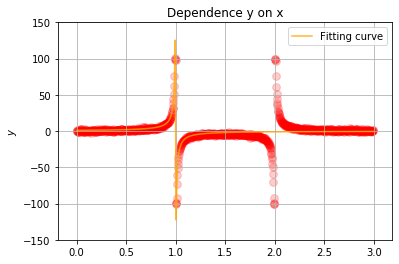

In [10]:
# Let's slightly change the error functionals
def f_error(w, x, y):
    a = w[0]
    b = w[1]
    c = w[2]
    d = w[3]
    return((a*x + b)/(x**2 + c*x + d) - y)

# Set the initial parameters
x0 = np.array([1, -1, -1, 1])
minimum_LM, cov_x_2, dictionary_2, mesg_2, solution_2 = leastsq(f_error, x0, args = (x_list,y_list), full_output = True)
print('The function evaluated at the output', len(dictionary_2.get('fvec')))
print('The number of function calls', dictionary_2.get('nfev'))
a_opt_LM = minimum_LM[0]
b_opt_LM = minimum_LM[1]
c_opt_LM = minimum_LM[2]
d_opt_LM = minimum_LM[3]
print('The optimal value of the coefficient a -', a_opt_LM)
print('The optimal value of the coefficient b -', b_opt_LM)
print('The optimal value of the coefficient c -', c_opt_LM)
print('The optimal value of the coefficient d -', d_opt_LM)

# Let's set the regression function with the selected coefficients
F_LM = (a_opt_LM*x_list + b_opt_LM)/(x_list**2 + c_opt_LM*x_list + d_opt_LM) 

plt.plot(x_list, F_LM, color = 'orange', linewidth = 1.5, label = 'Fitting curve', alpha = 0.8)
plt.scatter(x_list, y_list, s = 60, color='red', alpha = 0.2)
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.legend(loc = 'upper right')
plt.ylim((-150, 150))
plt.grid()
plt.show()

##  Differential Evolution

The amount of iterations 5
The number of function calls 900
The optimal value of the coefficient a - -1.3800068367077436
The optimal value of the coefficient b - 1.3806905087119052
The optimal value of the coefficient c - -2.0009331904161147
The optimal value of the coefficient d - 1.0009676087144654


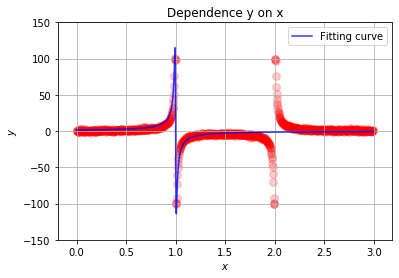

In [20]:
# Implement the function of the errors
def f_error(w):
    a = w[0]
    b = w[1]
    c = w[2]
    d = w[3]
    return(sum(((a*x_list + b)/(x_list**2 + c*x_list + d) - y_list) ** 2))

bounds = [(-3, 3), (-3, 3), (-3, 3), (-3, 3)]
result = differential_evolution(f_error, bounds, maxiter = 1000)
print('The amount of iterations', result['nit'])
print('The number of function calls', result['nfev'])
a_opt_DF = result['x'][0]
b_opt_DF = result['x'][1]
c_opt_DF = result['x'][2]
d_opt_DF = result['x'][3]
print('The optimal value of the coefficient a -', a_opt_DF)
print('The optimal value of the coefficient b -', b_opt_DF)
print('The optimal value of the coefficient c -', c_opt_DF)
print('The optimal value of the coefficient d -', d_opt_DF)

# Let's set the regression function with the selected coefficients
F_DF = (a_opt_DF*x_list + b_opt_DF)/(x_list**2 + c_opt_DF*x_list + d_opt_DF) 

plt.plot(x_list, F_DF, color = 'blue', linewidth = 1.5, label = 'Fitting curve', alpha = 0.8)
plt.scatter(x_list, y_list, s = 60, color='red', alpha = 0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.legend(loc = 'upper right')
plt.ylim((-150, 150))
plt.grid()
plt.show()

## Method comparison

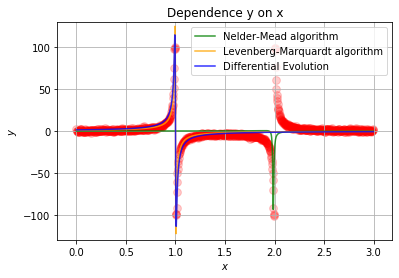

The sum of squared residuals for Nelder-Mead algorithm - 242946.30093148604
The sum of squared residuals for Levenberg-Marquardt algorithm - 134924.9305176605
The sum of squared residuals for Differential Evolution algorithm - 141895.4208714544


In [21]:
plt.plot(x_list, F_NM, color = 'green', linewidth = 1.5, label = 'Nelder-Mead algorithm', alpha = 0.8)
plt.plot(x_list, F_LM, color = 'orange', linewidth = 1.5, label = 'Levenberg-Marquardt algorithm', alpha = 0.8)
plt.plot(x_list, F_DF, color = 'blue', linewidth = 1.5, label = 'Differential Evolution', alpha = 0.8)
plt.scatter(x_list, y_list, s = 60, color='red', alpha = 0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.legend(loc = 'upper right')
plt.ylim((-130, 130))
plt.grid()
plt.show()

print('The sum of squared residuals for Nelder-Mead algorithm -', f_error([a_opt_NM, b_opt_NM, c_opt_NM, d_opt_NM]))
print('The sum of squared residuals for Levenberg-Marquardt algorithm -', f_error([a_opt_LM, b_opt_LM, c_opt_LM, d_opt_LM]))
print('The sum of squared residuals for Differential Evolution algorithm -', f_error([a_opt_DF, b_opt_DF, c_opt_DF, d_opt_DF]))

As can be seen from the graphs, the Nelder-Mead algorithm turned out to be the most inaccurate. This is also evident from the sum of residuals - 242946, almost twice as much as the score for other algorithms. The other two algorithms turned out to be much better - the left side of the graph is accurately described by approximating curves.

The Nelder-Mead algorithm and the Levenberg-Marquardt algorithm turned out to be the least efficient (in the number of iterations) of the considered algorithms. The Nelder-Mead algorithm used 286 iterations and evaluated the function 491 times to find the minimum. The Levenberg-Marquardt algorithm found a minimum of function in 308 iterations. The Differential Evolution algorithm completed the task in 5 iterations, and at the same time showed accuracy a little better than the Levenberg-Marquardt algorithm.